# ***Natural Disaster Prediction in R: A Step-by-Step Guide***

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the dataset from the URL
url <- "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
earthquake_data <- read.csv(url)

# Display the first few rows of the dataset
head(earthquake_data)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,⋯,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,2024-07-22T14:47:16.669Z,-5.35620,131.1858,61.226,5.10,mb,84,44,1.52200,0.63,⋯,2024-07-22T15:04:46.040Z,"176 km W of Tual, Indonesia",earthquake,6.68,7.053,0.072,63,reviewed,us,us
2,2024-07-22T14:39:22.246Z,39.67820,26.3581,9.772,4.50,mwr,102,33,0.74000,0.67,⋯,2024-07-22T16:08:54.163Z,"9 km NNW of Ayvacık, Turkey",earthquake,5.09,3.888,0.065,23,reviewed,us,us
3,2024-07-22T14:38:19.287Z,-15.57040,168.2145,11.027,5.10,mb,39,112,6.20400,0.76,⋯,2024-07-22T15:22:43.040Z,"103 km ENE of Norsup, Vanuatu",earthquake,12.75,4.230,0.088,42,reviewed,us,us
4,2024-07-22T12:36:40.470Z,19.16133,-155.3648,26.810,2.89,ml,9,239,0.08182,0.10,⋯,2024-07-22T12:39:21.070Z,"12 km ESE of Pāhala, Hawaii",earthquake,1.77,2.710,0.390,8,automatic,hv,hv
5,2024-07-22T12:25:54.570Z,19.29800,-64.7281,39.000,3.67,md,13,288,0.88980,0.41,⋯,2024-07-22T13:37:37.816Z,"107 km N of Cruz Bay, U.S. Virgin Islands",earthquake,4.45,19.460,0.220,9,reviewed,pr,pr
6,2024-07-22T11:26:41.725Z,59.95390,-152.6994,100.300,3.00,ml,NA,NA,NA,0.13,⋯,2024-07-22T11:51:59.040Z,"52 km WNW of Anchor Point, Alaska",earthquake,NA,1.100,NA,NA,automatic,ak,ak


In [ ]:
# Explore the dataset
str(earthquake_data)
summary(earthquake_data)


'data.frame':	1321 obs. of  22 variables:
 $ time           : chr  "2024-07-22T14:47:16.669Z" "2024-07-22T14:39:22.246Z" "2024-07-22T14:38:19.287Z" "2024-07-22T12:36:40.470Z" ...
 $ latitude       : num  -5.36 39.68 -15.57 19.16 19.3 ...
 $ longitude      : num  131.2 26.4 168.2 -155.4 -64.7 ...
 $ depth          : num  61.23 9.77 11.03 26.81 39 ...
 $ mag            : num  5.1 4.5 5.1 2.89 3.67 3 4.9 4.5 2.8 4.4 ...
 $ magType        : chr  "mb" "mwr" "mb" "ml" ...
 $ nst            : int  84 102 39 9 13 NA 31 78 NA 89 ...
 $ gap            : num  44 33 112 239 288 NA 99 45 NA 40 ...
 $ dmin           : num  1.522 0.74 6.204 0.0818 0.8898 ...
 $ rms            : num  0.63 0.67 0.76 0.1 0.41 ...
 $ net            : chr  "us" "us" "us" "hv" ...
 $ id             : chr  "us7000n0ut" "us7000n0uq" "us7000n0ur" "hv74352371" ...
 $ updated        : chr  "2024-07-22T15:04:46.040Z" "2024-07-22T16:08:54.163Z" "2024-07-22T15:22:43.040Z" "2024-07-22T12:39:21.070Z" ...
 $ place          : chr  "17

     time              latitude         longitude           depth       
 Length:1321        Min.   :-63.785   Min.   :-179.99   Min.   : -0.67  
 Class :character   1st Qu.: -6.383   1st Qu.:-149.12   1st Qu.: 10.00  
 Mode  :character   Median : 19.384   Median : -74.58   Median : 15.04  
                    Mean   : 17.016   Mean   : -41.04   Mean   : 70.28  
                    3rd Qu.: 38.146   3rd Qu.:  95.33   3rd Qu.: 69.80  
                    Max.   : 84.956   Max.   : 180.00   Max.   :641.72  
                                                                        
      mag          magType               nst              gap       
 Min.   :2.450   Length:1321        Min.   :  5.00   Min.   : 15.0  
 1st Qu.:2.900   Class :character   1st Qu.: 21.00   1st Qu.: 66.0  
 Median :4.200   Mode  :character   Median : 33.00   Median : 96.0  
 Mean   :3.863                      Mean   : 45.51   Mean   :110.9  
 3rd Qu.:4.500                      3rd Qu.: 58.00   3rd Qu.:144.0  
 M

In [ ]:
# Select relevant columns and remove rows with missing values
cleaned_data <- earthquake_data %>%
  select(time, latitude, longitude, mag) %>%
  filter(!is.na(mag))

# Display the cleaned dataset
head(cleaned_data)


,time,latitude,longitude,mag
,<chr>,<dbl>,<dbl>,<dbl>
1,2024-07-22T14:47:16.669Z,-5.35620,131.1858,5.10
2,2024-07-22T14:39:22.246Z,39.67820,26.3581,4.50
3,2024-07-22T14:38:19.287Z,-15.57040,168.2145,5.10
4,2024-07-22T12:36:40.470Z,19.16133,-155.3648,2.89
5,2024-07-22T12:25:54.570Z,19.29800,-64.7281,3.67
6,2024-07-22T11:26:41.725Z,59.95390,-152.6994,3.00


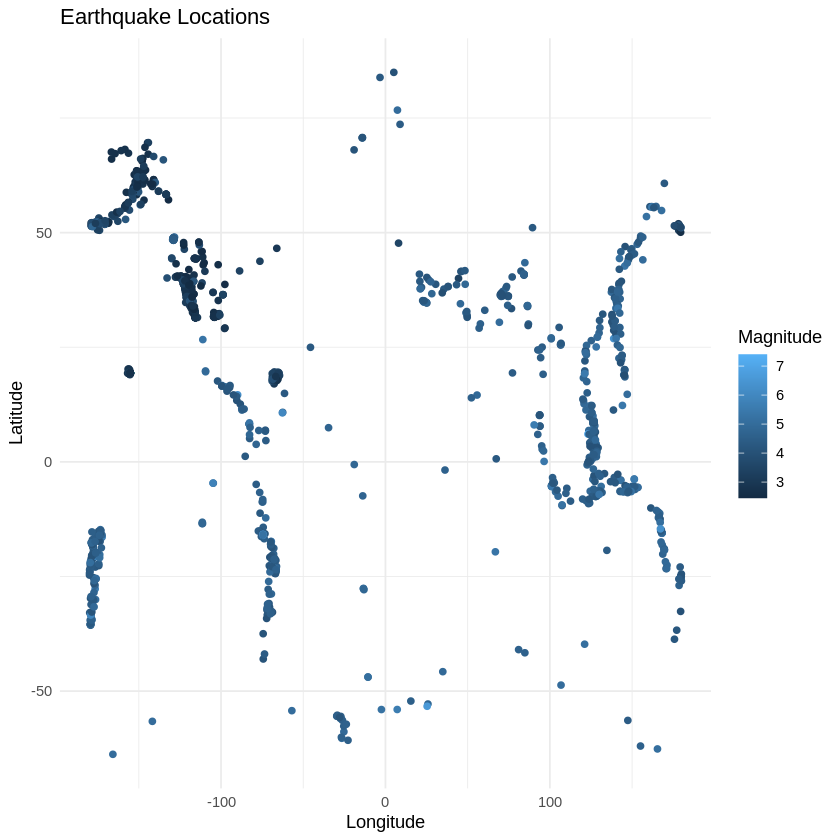

In [ ]:
# Plot the locations of the earthquakes
ggplot(cleaned_data, aes(x = longitude, y = latitude, color = mag)) +
  geom_point() +
  theme_minimal() +
  labs(title = "Earthquake Locations", x = "Longitude", y = "Latitude", color = "Magnitude")


In [ ]:
# Build a simple linear regression model
model <- lm(mag ~ latitude + longitude, data = cleaned_data)



In [ ]:
# Evaluate the model's performance
summary(model)



Call:
lm(formula = mag ~ latitude + longitude, data = cleaned_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5810 -0.5269 -0.0488  0.4221  3.2659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.2329250  0.0224295  188.72   <2e-16 ***
latitude    -0.0134083  0.0006586  -20.36   <2e-16 ***
longitude    0.0034515  0.0001592   21.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6879 on 1318 degrees of freedom
Multiple R-squared:  0.4439,	Adjusted R-squared:  0.443 
F-statistic:   526 on 2 and 1318 DF,  p-value: < 2.2e-16


In [ ]:
# Create a new dataset for prediction
new_data <- data.frame(latitude = c(37.77, 34.05), longitude = c(-122.42, -118.25))

# Make predictions
predictions <- predict(model, new_data)

# Display predictions
new_data$predicted_mag <- predictions
new_data


latitude,longitude,predicted_mag
<dbl>,<dbl>,<dbl>
37.77,-122.42,3.303962
34.05,-118.25,3.368233


In [ ]:
# Load the shiny library
library(shiny)

# Define the UI
ui <- fluidPage(
  titlePanel("Earthquake Magnitude Prediction"),
  sidebarLayout(
    sidebarPanel(
      numericInput("latitude", "Latitude:", value = 0),
      numericInput("longitude", "Longitude:", value = 0),
      actionButton("predict", "Predict Magnitude")
    ),
    mainPanel(
      textOutput("prediction")
    )
  )
)

# Define the server
server <- function(input, output) {
  observeEvent(input$predict, {
    new_data <- data.frame(latitude = input$latitude, longitude = input$longitude)
    prediction <- predict(model, new_data)
    output$prediction <- renderText({
      paste("Predicted Magnitude:", round(prediction, 2))
    })
  })
}

# Run the application
shinyApp(ui = ui, server = server)



Listening on http://127.0.0.1:6306

